In [116]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import utils


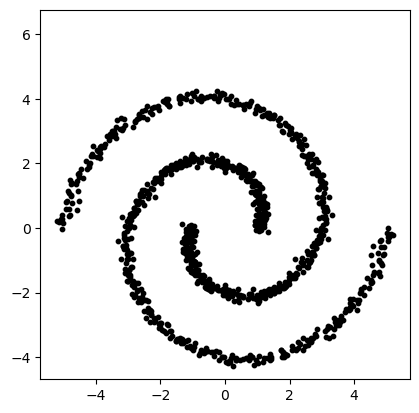

In [117]:
def sample_spiral():
    points_per_cluster = 500
    bandwidth = 0.1
    data = np.empty((points_per_cluster, 2))
    w = np.arange(1, points_per_cluster + 1).astype(np.float32) / points_per_cluster
    data[:,0] = (4 * w + 1) * np.cos(2*np.pi * w) + np.random.randn(points_per_cluster) * bandwidth
    data[:,1] = (4 * w + 1) * np.sin(2*np.pi * w) + np.random.randn(points_per_cluster) * bandwidth
    data = np.vstack((data, -data))
    return data

X = sample_spiral()
N = X.shape[0]

K=2

plt.scatter(X[:, 0], X[:, 1], s = 10, c = 'k')
plt.axis('square')
plt.show()

# if y is the assignment of the N points to clusters 0 and 1, then plot as
# plt.scatter(X[:, 0], X[:, 1], s = 10, c = y)


# scaling paramater (we may want to try different values and select the least-distored clusters)
sigma = 0.1


# YOUR CODE GOES HERE

Here we preform standard K-means on our data.

Q1) Perform the clustering with the K-means algorithm you developed in Assignment 1. Does the
algorithm correctly cluster the spirals? Explain briefly its results. (why does it or does it not
work?)

It does not work, the reason it does not work is because the group representatives are decided by eucliden distance, and when using distance as a measure in this space, it makes sese our two centroids will divide our image into two halves with a linear discriminator.

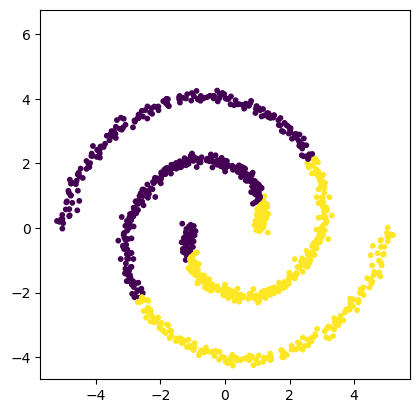

In [118]:
assigngment, reps, J, o = utils.kmeans(X,2)
plt.scatter(X[:, 0], X[:, 1], s = 10, c = assigngment)
plt.axis('square')
plt.show()

In this cell we calculate W,D, and L

In [119]:
W = np.exp(-1/(2*sigma**2)* np.linalg.norm(X[:, np.newaxis, :] - X[np.newaxis, :, :], axis=2)**2)
row_sums = np.sum(W, axis=1)
# Create a diagonal matrix D with row sums as diagonal elements
D = np.diag(row_sums)
D_inv = np.linalg.inv(D)
L = D_inv@(D-W)@D_inv


In this we have transformed the space and the points now appear as shown below where the points of each spiral are organized together.

79
Indices of the two smallest elements: [79 78]


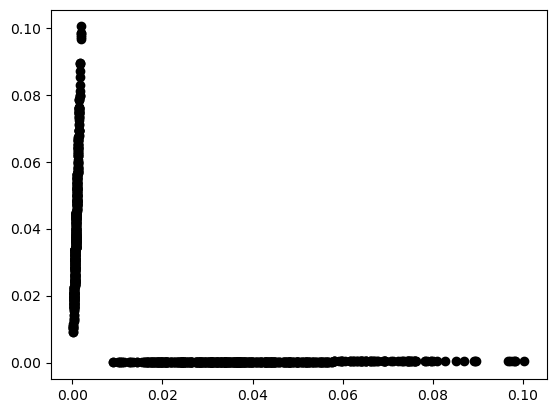

In [120]:
eiVAL, eiVEC = np.linalg.eig(L)
print(np.argmin(eiVAL))

# Find the indices of the two smallest elements
indices = np.argsort(eiVAL)[:2]

# Print the indices of the two smallest elements
print("Indices of the two smallest elements:", indices)


ne = eiVEC[:,indices]
plt.scatter(ne[:,0],ne[:,1],c='k')

We now obtain our assignments using K-means clustering on our eigenvectors, and now the assignments will show the spiraling

Does the spectral clustering identify the two spirals? Explain briefly its results. (why does it or
does it not work?)

Yes it works, this is because we have translated the points into a new space, and in this space the distance between points in the same spiral are smaller than two points across spirals.

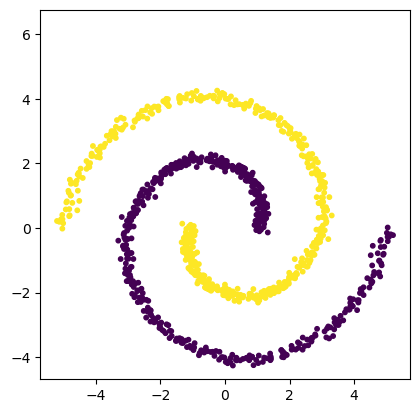

In [121]:
assigngment, reps, J, o = utils.kmeans(ne,2)
plt.scatter(X[:, 0], X[:, 1], s = 10, c = assigngment)
plt.axis('square')
plt.show()